In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
mushroom_data = pd.read_csv(r'D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\mushrooms.csv')

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

In [3]:
mushroom_data.shape

(8124, 23)

In [4]:
pd.set_option('display.max_columns', 30)
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Attribute Information: classes: 

edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [5]:
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
mushroom_data.rename(columns={'cap-shape':'cap_shape', 'cap-surface':'cap_surface', 'cap-color':'cap_color',
                              'gill-attachment':'gill_attachment', 'gill-spacing':'gill_spacing', 'gill-size':'gill_size',
                              'gill-color':'gill_color', 'stalk-shape':'stalk_shape', 'stalk-root':'stalk_root',
                              'stalk-surface-above-ring':'stalk_surface_above_ring', 
                              'stalk-surface-below-ring':'stalk_surface_below_ring', 
                              'stalk-color-above-ring':'stalk_color_above_ring',
                              'stalk-color-below-ring':'stalk_color_below_ring', 'veil-type':'veil_type', 
                              'veil-color':'veil_color', 'ring-number':'ring_number',
                              'ring-type':'ring_type', 'spore-print-color':'spore_print_color'},inplace=True)

In [7]:
mushroom_data['class'].replace({'e':"edible", 'p':"poisonous"},inplace=True, regex=True)
mushroom_data['cap_shape'].replace({'b':"bell", 'c':"conical", 'x':"convex", 'f':"flat", 'k':"knobbed", 's':"sunken"},inplace=True, regex=True)
mushroom_data['cap_surface'].replace({'f':"fibrous", 'g':"grooves", 'y':"scaly", 's':"smooth"},inplace=True, regex=True)
mushroom_data['cap_color'].replace({'n':"brown", 'c':"cinnamon", 'g':"gray", 'r':"green", 'p':"pink", 'u':"purple", 'e':"red", 'w':"white", 'y':"yellow", 'b':"buff"},inplace=True, regex=True)
mushroom_data['bruises'].replace({'t':"bruised", 'f':"not_bruised"},inplace=True, regex=True)
mushroom_data['odor'].replace({'a':"almond", 'l':"anise", 'c':"creosote", 'y':"fishy", 'f':"foul", 'm':"musty", 'n':"none", 'p':"pungent", 's':"spicy"},inplace=True, regex=True)
mushroom_data['gill_attachment'].replace({'a':"attached", 'd':"descending", 'f':"free", 'n':"notched"},inplace=True, regex=True)
mushroom_data['gill_spacing'].replace({'c':"close", 'w':"crowded", 'd':"distant"},inplace=True, regex=True)
mushroom_data['gill_size'].replace({'b':"broad", 'n':"narrow"},inplace=True, regex=True)
mushroom_data['gill_color'].replace({'k':"black", 'b':"buff", 'n':"brown", 'h':"chocolate", 'g':"gray", 'r':"green", 'o':"orange", 'p':"pink", 'u':"purple", 'e':"red", 'w':"white", 'y':"yellow"},inplace=True, regex=True)
mushroom_data['stalk_shape'].replace({'e':"enlarging", 't':"tapering"},inplace=True, regex=True)
#mushroom_data['stalk_root'].replace({'b':"bulbous", 'c':"club", 'u':"cup", 'e':"equal", 'z':"rhizomorphs", 'r':'rooted', '?':'missing'},inplace=True, regex=True)
mushroom_data['stalk_surface_above_ring'].replace({'f':"fibrous", 'y':"scaly", 'k':"silky", 's':"smooth"},inplace=True, regex=True)
mushroom_data['stalk_surface_below_ring'].replace({'f':"fibrous", 'y':"scaly", 'k':"silky", 's':"smooth"},inplace=True, regex=True)
mushroom_data['stalk_color_above_ring'].replace({'n':"brown", 'b':"buff", 'c':"cinnamon", 'g':"gray", 'o':"orange", 'p':"pink", 'e':"red", 'w':"white", 'y':"yellow"},inplace=True, regex=True)
mushroom_data['stalk_color_below_ring'].replace({'n':"brown", 'b':"buff", 'c':"cinnamon", 'g':"gray", 'o':"orange", 'p':"pink", 'e':"red", 'w':"white", 'y':"yellow"},inplace=True, regex=True)
mushroom_data['veil_type'].replace({'p':"partial", 'u':"universal"},inplace=True, regex=True)
mushroom_data['veil_color'].replace({'n':"brown", 'o':"orange", 'w':"white", 'y':"yellow"},inplace=True, regex=True)
mushroom_data['ring_number'].replace({'n':"none", 'o':"one", 't':"two"},inplace=True, regex=True)
mushroom_data['ring_type'].replace({'c':"cobwebby", 'e':"evanescent", 'f':"flaring", 'l':"large", 'n':"none", 'p':"pendant", 's':"sheathings", 'z':"zone"},inplace=True, regex=True)
mushroom_data['spore_print_color'].replace({'k':"black", 'n':"brown", 'b':"buff", 'h':"chocolate", 'r':"green", 'o':"orange", 'u':"purple", 'w':"white", 'y':"yellow"},inplace=True, regex=True)
mushroom_data['population'].replace({'a':"abundant", 'c':"clustered", 'n':"numerous", 's':"scattered", 'v':"several", 'y':"solitary"},inplace=True, regex=True)
mushroom_data['habitat'].replace({'g':"grasses", 'm':"meadows", 'p':"paths", 'u':"urban", 'w':"waste", 'd':"woods", 'l':"leaves"},inplace=True, regex=True)


In [8]:
mushroom_data['stalk_root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk_root, dtype: int64

In [9]:
mushroom_data['stalk_root'].replace({'b':"bulbous", 'c':"club", 'u':"cup", 'e':"equal", 'z':"rhizomorphs", 'r':'rooted', '?':'missing'},inplace=True)


In [10]:
mushroom_data['stalk_root'].value_counts()

bulbous    3776
missing    2480
equal      1120
club        556
rooted      192
Name: stalk_root, dtype: int64

In [11]:
mushroom_data.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [12]:
mushroom_data.describe(include='all').T

,count,unique,top,freq
class,8124,2,edible,4208
cap_shape,8124,6,convex,3656
cap_surface,8124,4,scaly,3244
cap_color,8124,10,brown,2284
bruises,8124,2,not_bruised,4748
odor,8124,9,none,3528
gill_attachment,8124,2,free,7914
gill_spacing,8124,2,close,6812
gill_size,8124,2,broad,5612
gill_color,8124,12,buff,1728


In [13]:
#removing veil_type column
mushroom_data.drop('veil_type', axis=1, inplace=True)

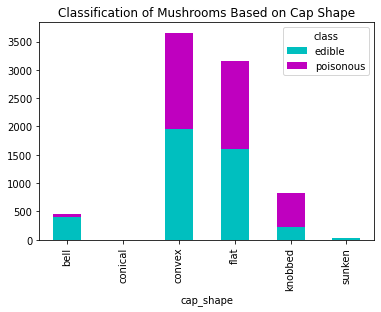

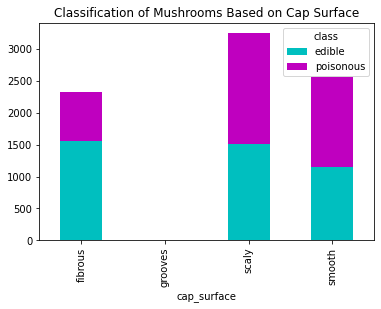

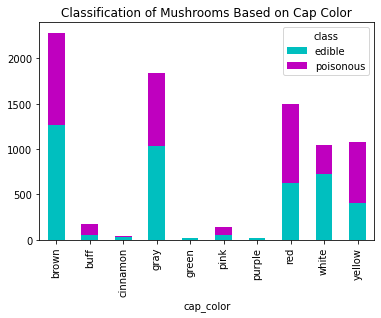

In [14]:
plot_cap_shape = mushroom_data.groupby(['class', 'cap_shape']).size().reset_index().pivot(columns='class', index='cap_shape', values=0)
plot_cap_shape.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on Cap Shape')

plot_cap_surface = mushroom_data.groupby(['class', 'cap_surface']).size().reset_index().pivot(columns='class', index='cap_surface', values=0)
plot_cap_surface.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on Cap Surface')

plot_cap_color = mushroom_data.groupby(['class', 'cap_color']).size().reset_index().pivot(columns='class', index='cap_color', values=0)
plot_cap_color.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on Cap Color')

plt.show()

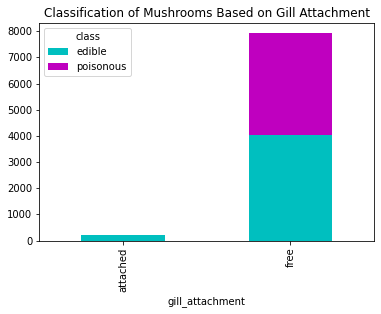

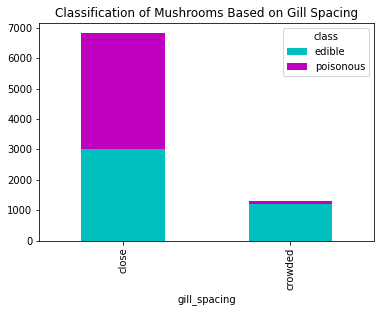

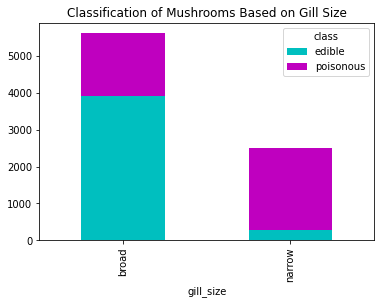

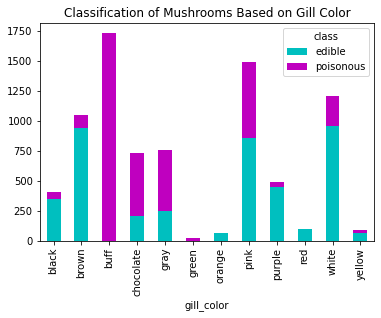

In [15]:
plot_gill_attachment = mushroom_data.groupby(['class', 'gill_attachment']).size().reset_index().pivot(columns='class', index='gill_attachment', values=0)
plot_gill_attachment.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on Gill Attachment')

plot_gill_spacing = mushroom_data.groupby(['class', 'gill_spacing']).size().reset_index().pivot(columns='class', index='gill_spacing', values=0)
plot_gill_spacing.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on Gill Spacing')

plot_gill_size = mushroom_data.groupby(['class', 'gill_size']).size().reset_index().pivot(columns='class', index='gill_size', values=0)
plot_gill_size.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on Gill Size')

plot_gill_color = mushroom_data.groupby(['class', 'gill_color']).size().reset_index().pivot(columns='class', index='gill_color', values=0)
plot_gill_color.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on Gill Color')

plt.show()

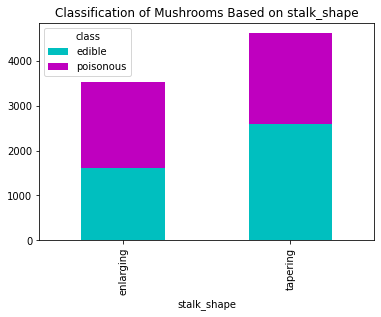

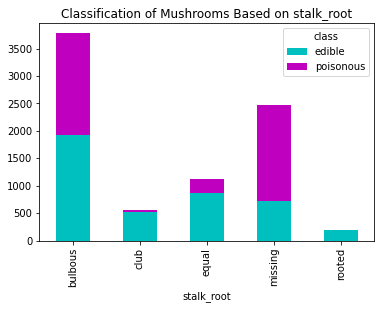

In [16]:
plot_stalk_shape = mushroom_data.groupby(['class', 'stalk_shape']).size().reset_index().pivot(columns='class', index='stalk_shape', values=0)
plot_stalk_shape.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on stalk_shape')

plot_stalk_root = mushroom_data.groupby(['class', 'stalk_root']).size().reset_index().pivot(columns='class', index='stalk_root', values=0)
plot_stalk_root.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on stalk_root')

plt.show()

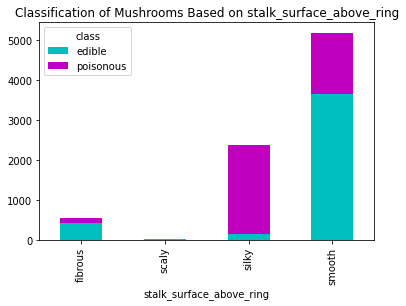

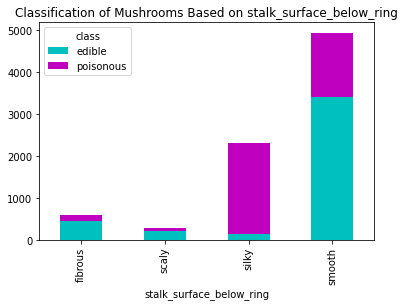

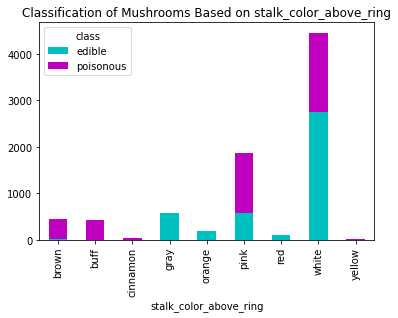

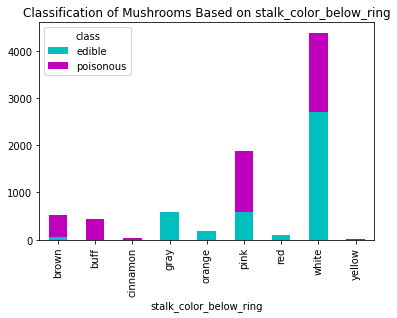

In [17]:
plot_stalk_surface_above_ring = mushroom_data.groupby(['class', 'stalk_surface_above_ring']).size().reset_index().pivot(columns='class', index='stalk_surface_above_ring', values=0)
plot_stalk_surface_above_ring.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on stalk_surface_above_ring')

plot_stalk_surface_below_ring = mushroom_data.groupby(['class', 'stalk_surface_below_ring']).size().reset_index().pivot(columns='class', index='stalk_surface_below_ring', values=0)
plot_stalk_surface_below_ring.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on stalk_surface_below_ring')

plot_stalk_color_above_ring = mushroom_data.groupby(['class', 'stalk_color_above_ring']).size().reset_index().pivot(columns='class', index='stalk_color_above_ring', values=0)
plot_stalk_color_above_ring.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on stalk_color_above_ring')

plot_stalk_color_below_ring = mushroom_data.groupby(['class', 'stalk_color_below_ring']).size().reset_index().pivot(columns='class', index='stalk_color_below_ring', values=0)
plot_stalk_color_below_ring.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on stalk_color_below_ring')

plt.show()

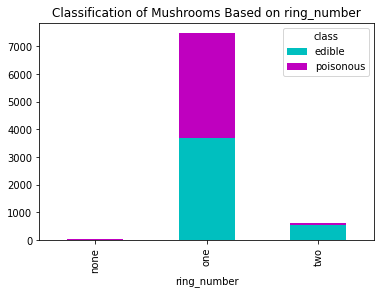

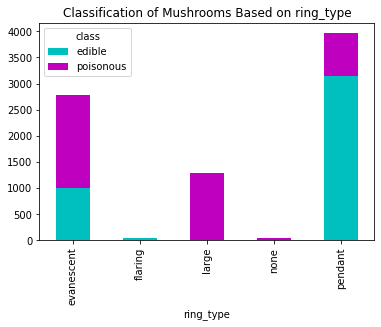

In [18]:
plot_ring_number = mushroom_data.groupby(['class', 'ring_number']).size().reset_index().pivot(columns='class', index='ring_number', values=0)
plot_ring_number.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on ring_number')

plot_ring_type = mushroom_data.groupby(['class', 'ring_type']).size().reset_index().pivot(columns='class', index='ring_type', values=0)
plot_ring_type.plot(kind='bar', stacked=True, color=['c','m'])
plt.title('Classification of Mushrooms Based on ring_type')

plt.show()

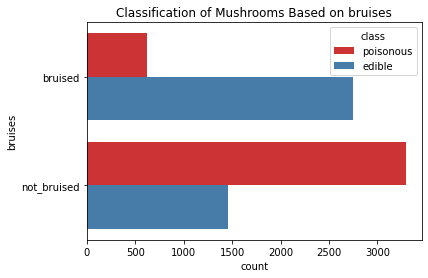

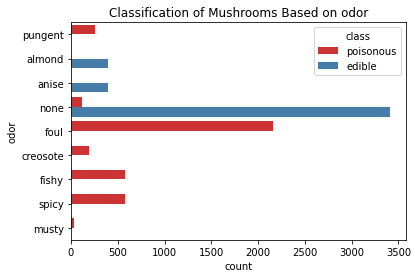

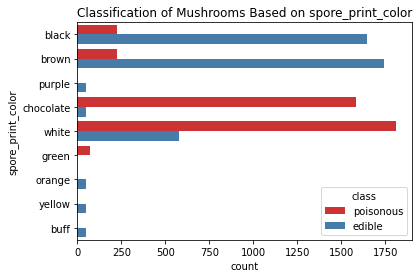

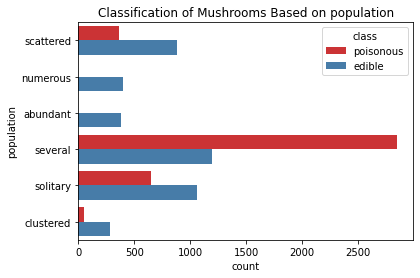

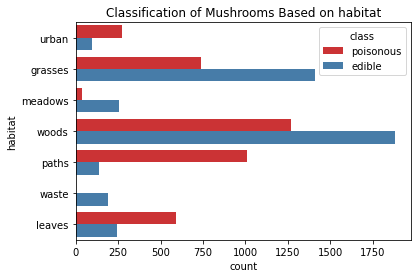

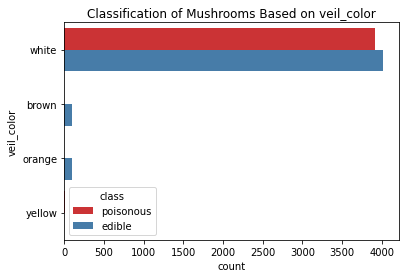

In [19]:
col = ['bruises', 'odor', 'spore_print_color', 'population', 'habitat', 'veil_color']
for col in col:
    sns.countplot(data=mushroom_data, y=mushroom_data[col], hue='class', palette="Set1")
    plt.title("Classification of Mushrooms Based on {}".format(col))
    plt.show()

In [20]:
group_data = mushroom_data.groupby('class')
edible_mushrooms = group_data.get_group('edible')
poisonous_mushrooms = group_data.get_group('edible')

In [21]:
edible_mushrooms = edible_mushrooms.drop('class', axis=1)
poisonous_mushrooms = poisonous_mushrooms.drop('class', axis=1)

Count of cap_shape:
 convex     1948
flat       1596
bell        404
knobbed     228
sunken       32
Name: cap_shape, dtype: int64


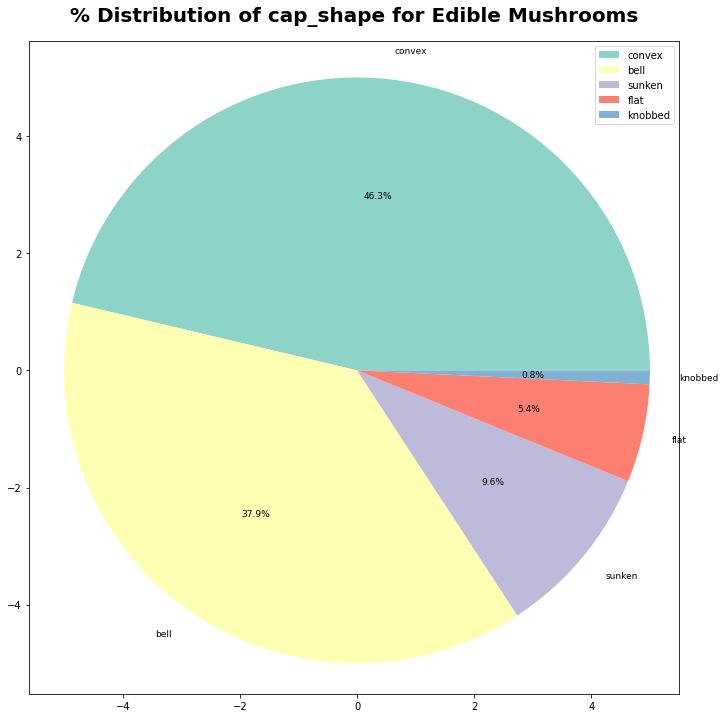

Count of cap_surface:
 fibrous    1560
scaly      1504
smooth     1144
Name: cap_surface, dtype: int64


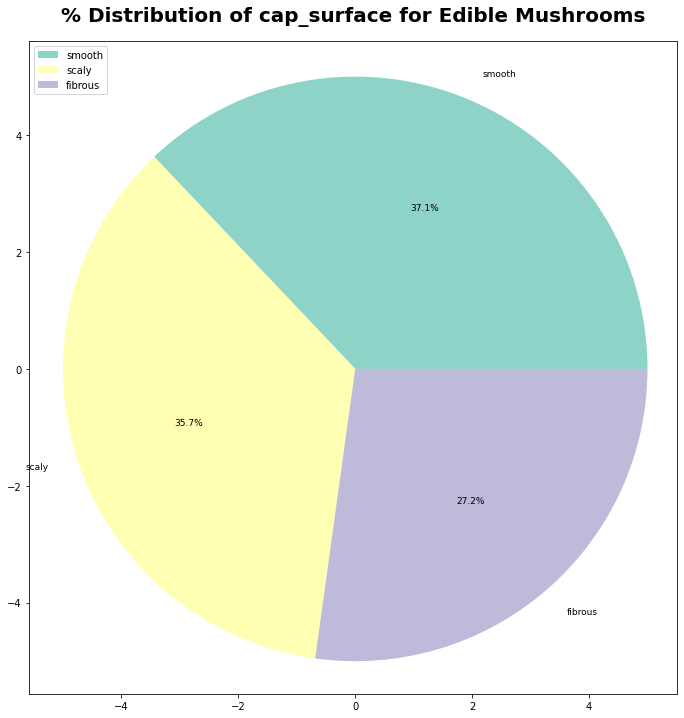

Count of cap_color:
 brown       1264
gray        1032
white        720
red          624
yellow       400
pink          56
buff          48
cinnamon      32
purple        16
green         16
Name: cap_color, dtype: int64


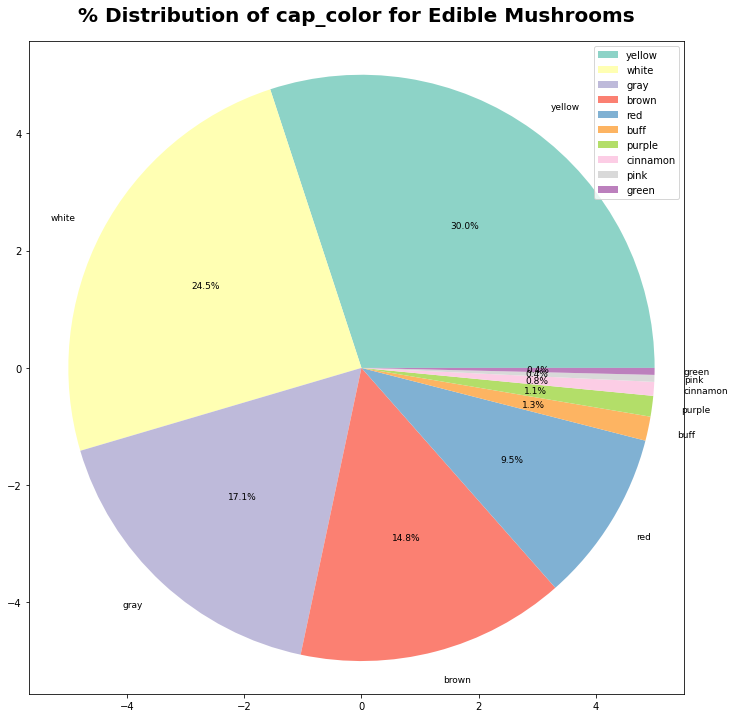

Count of bruises:
 bruised        2752
not_bruised    1456
Name: bruises, dtype: int64


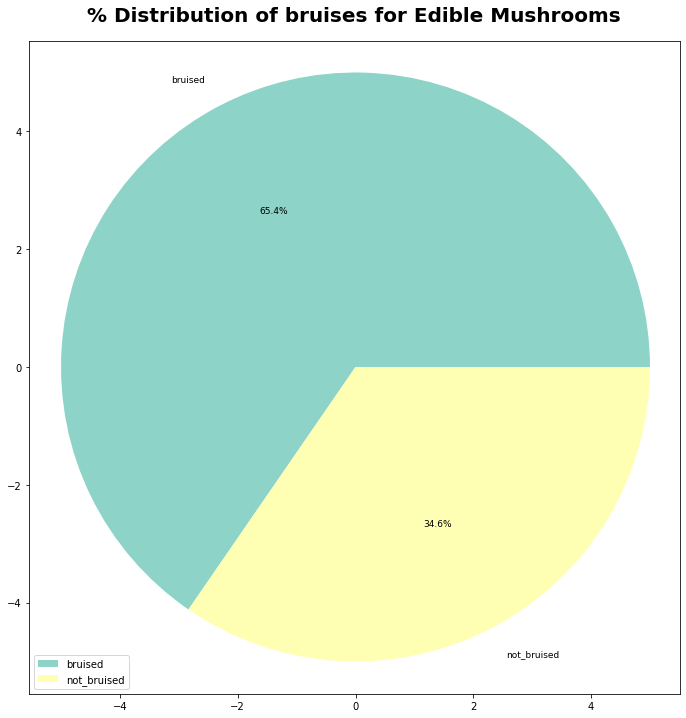

Count of odor:
 none      3408
almond     400
anise      400
Name: odor, dtype: int64


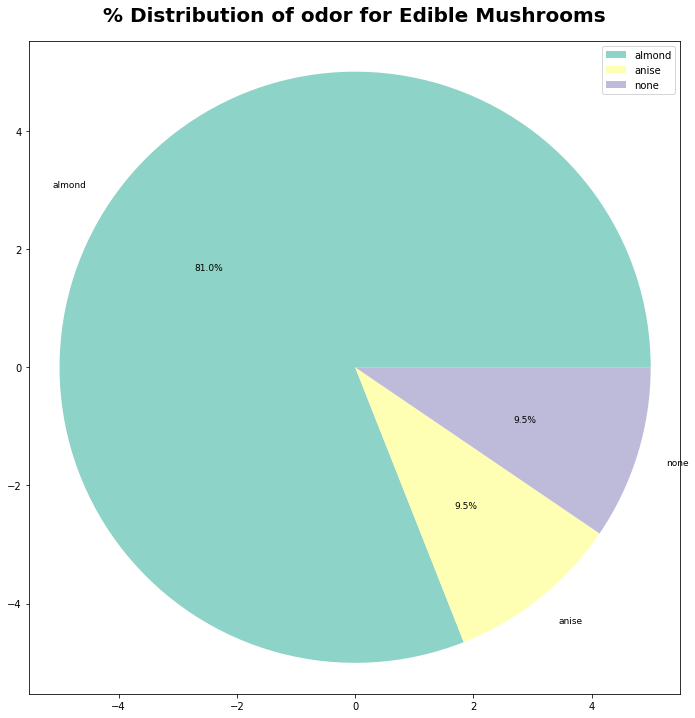

Count of gill_attachment:
 free        4016
attached     192
Name: gill_attachment, dtype: int64


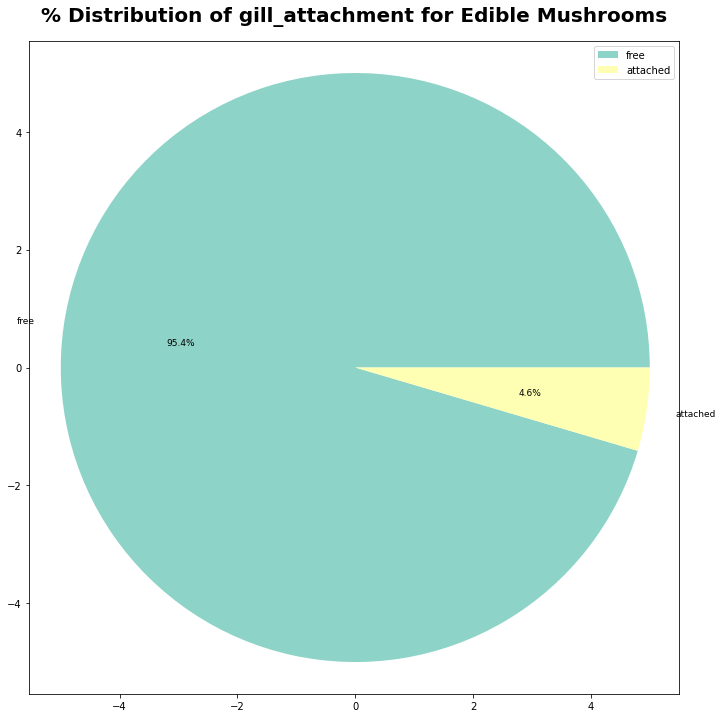

Count of gill_spacing:
 close      3008
crowded    1200
Name: gill_spacing, dtype: int64


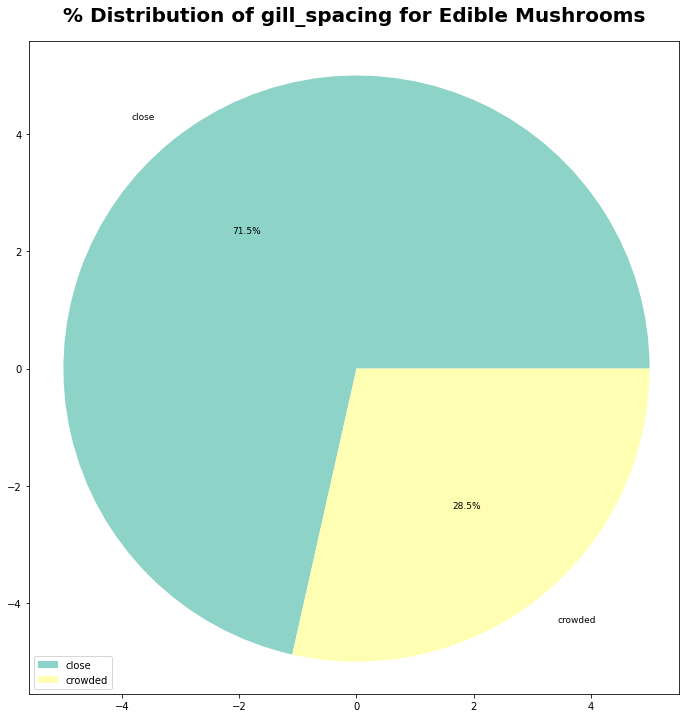

Count of gill_size:
 broad     3920
narrow     288
Name: gill_size, dtype: int64


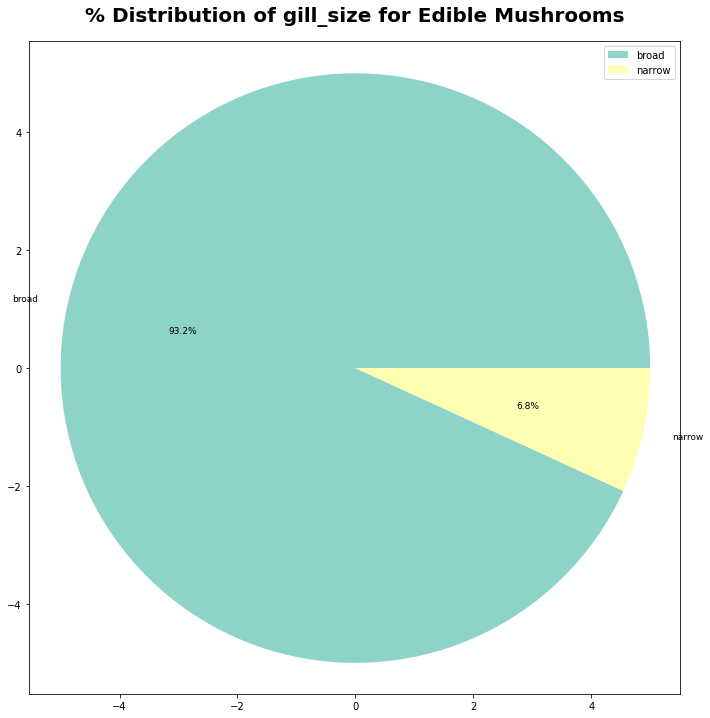

Count of gill_color:
 white        956
brown        936
pink         852
purple       444
black        344
gray         248
chocolate    204
red           96
yellow        64
orange        64
Name: gill_color, dtype: int64


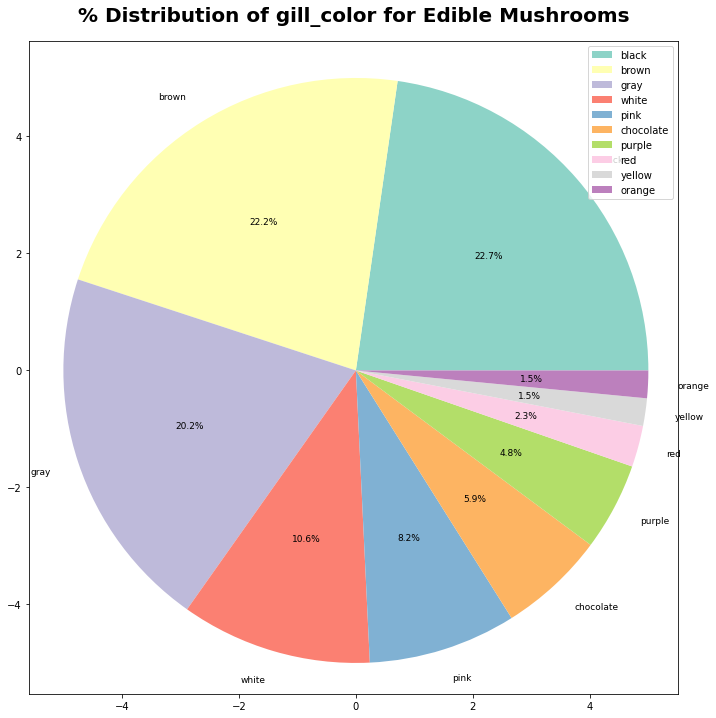

Count of stalk_shape:
 tapering     2592
enlarging    1616
Name: stalk_shape, dtype: int64


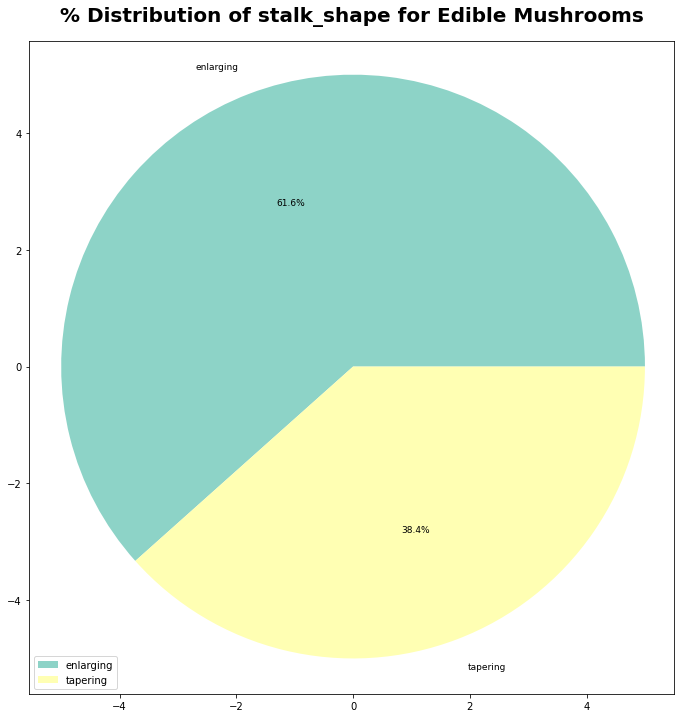

Count of stalk_root:
 bulbous    1920
equal       864
missing     720
club        512
rooted      192
Name: stalk_root, dtype: int64


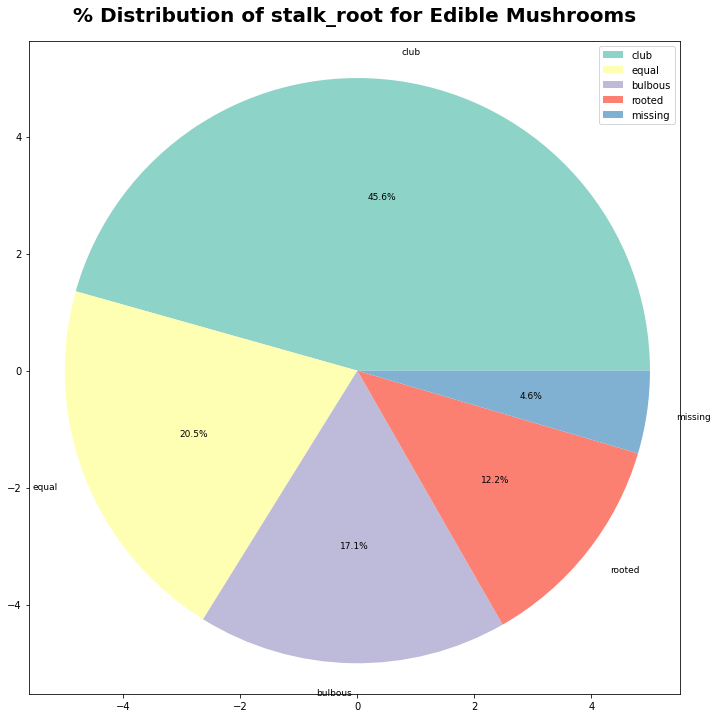

Count of stalk_surface_above_ring:
 smooth     3640
fibrous     408
silky       144
scaly        16
Name: stalk_surface_above_ring, dtype: int64


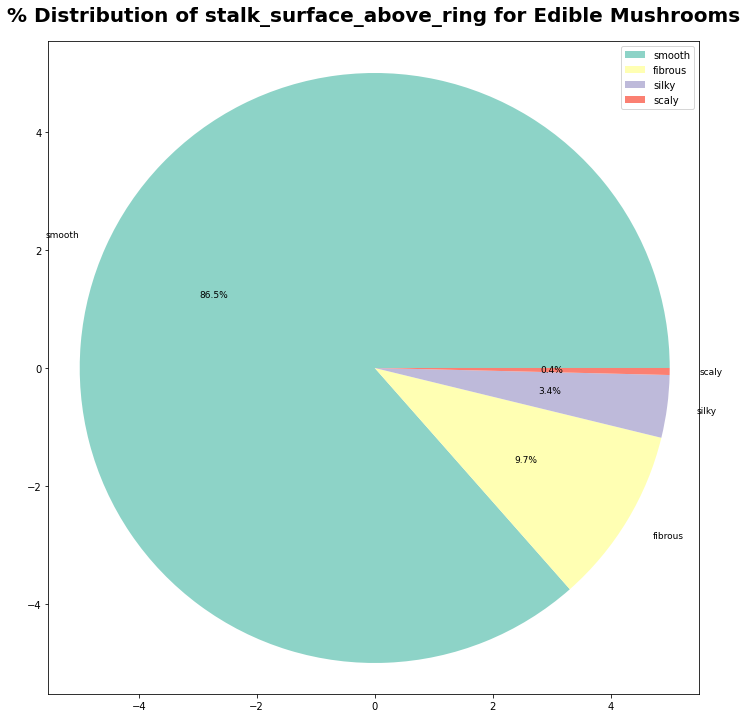

Count of stalk_surface_below_ring:
 smooth     3400
fibrous     456
scaly       208
silky       144
Name: stalk_surface_below_ring, dtype: int64


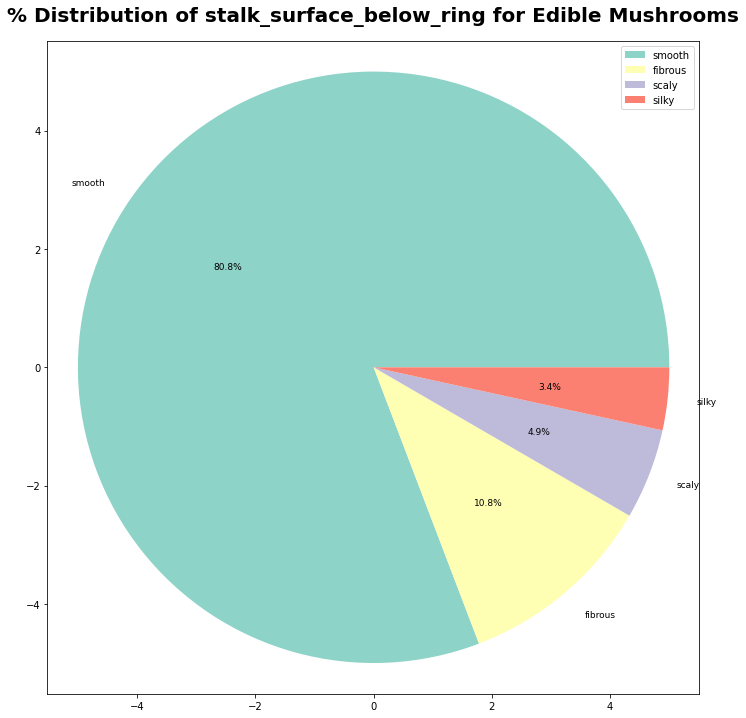

Count of stalk_color_above_ring:
 white     2752
gray       576
pink       576
orange     192
red         96
brown       16
Name: stalk_color_above_ring, dtype: int64


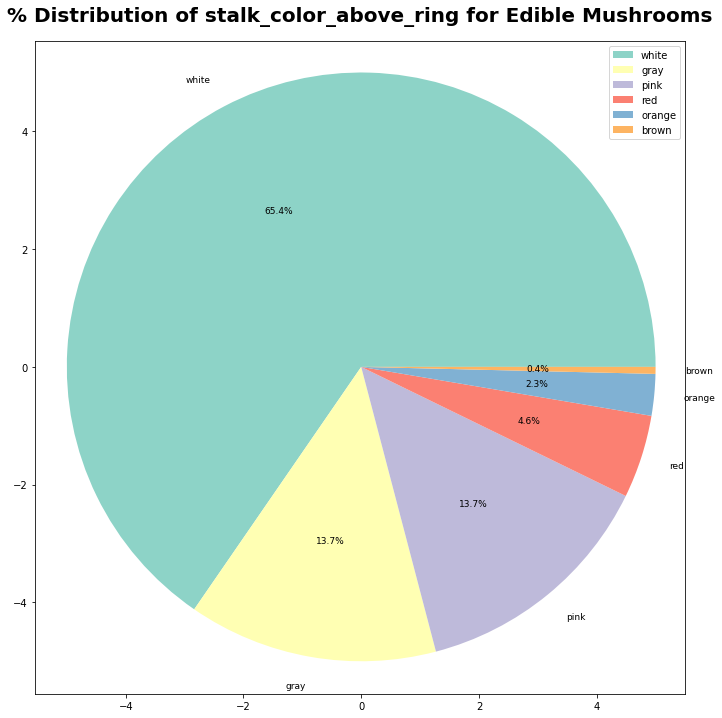

Count of stalk_color_below_ring:
 white     2704
pink       576
gray       576
orange     192
red         96
brown       64
Name: stalk_color_below_ring, dtype: int64


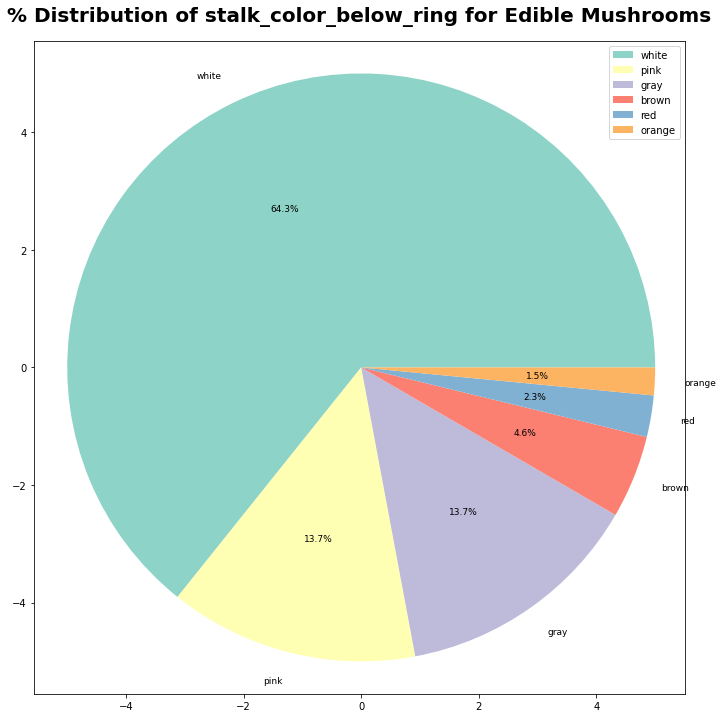

Count of veil_color:
 white     4016
brown       96
orange      96
Name: veil_color, dtype: int64


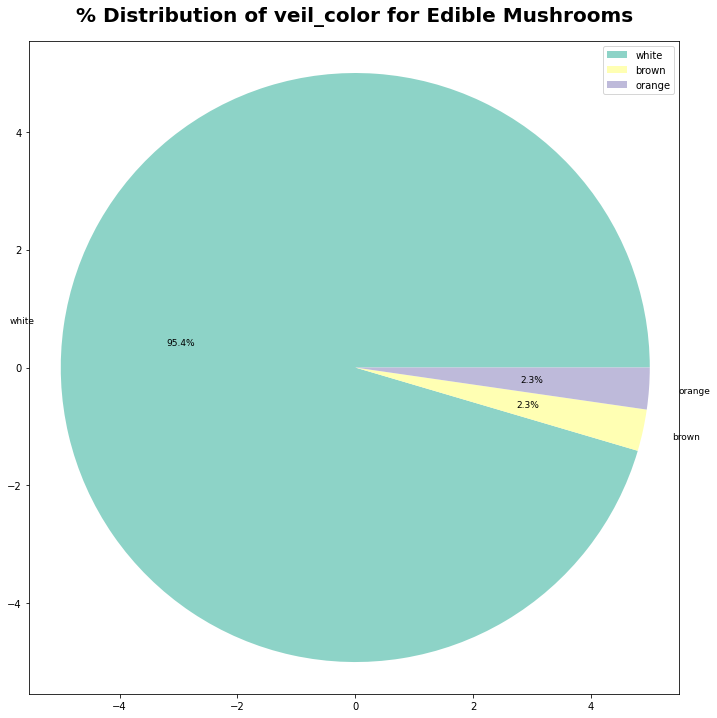

Count of ring_number:
 one    3680
two     528
Name: ring_number, dtype: int64


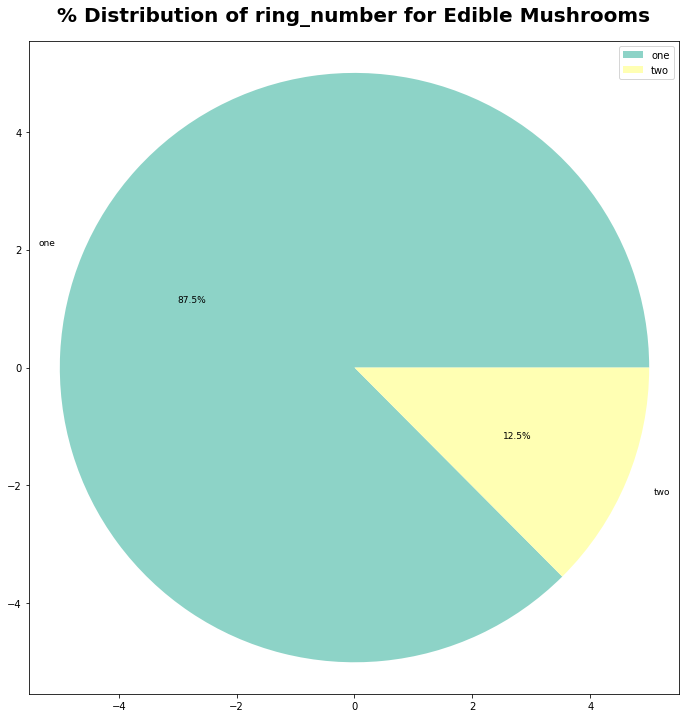

Count of ring_type:
 pendant       3152
evanescent    1008
flaring         48
Name: ring_type, dtype: int64


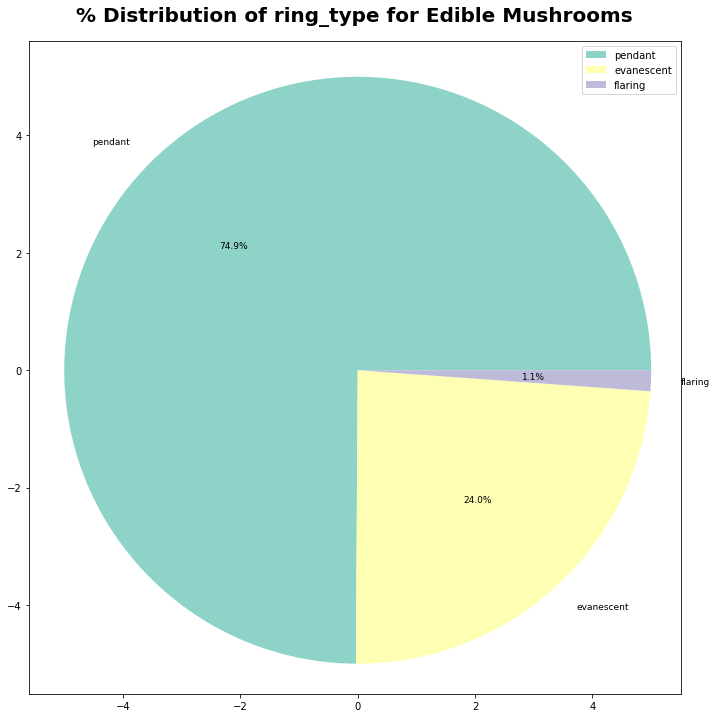

Count of spore_print_color:
 brown        1744
black        1648
white         576
purple         48
chocolate      48
orange         48
yellow         48
buff           48
Name: spore_print_color, dtype: int64


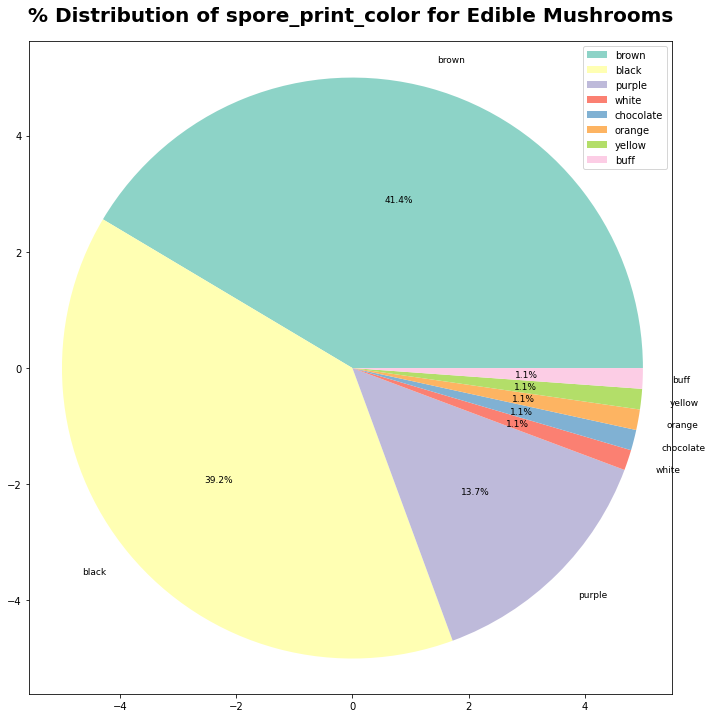

Count of population:
 several      1192
solitary     1064
scattered     880
numerous      400
abundant      384
clustered     288
Name: population, dtype: int64


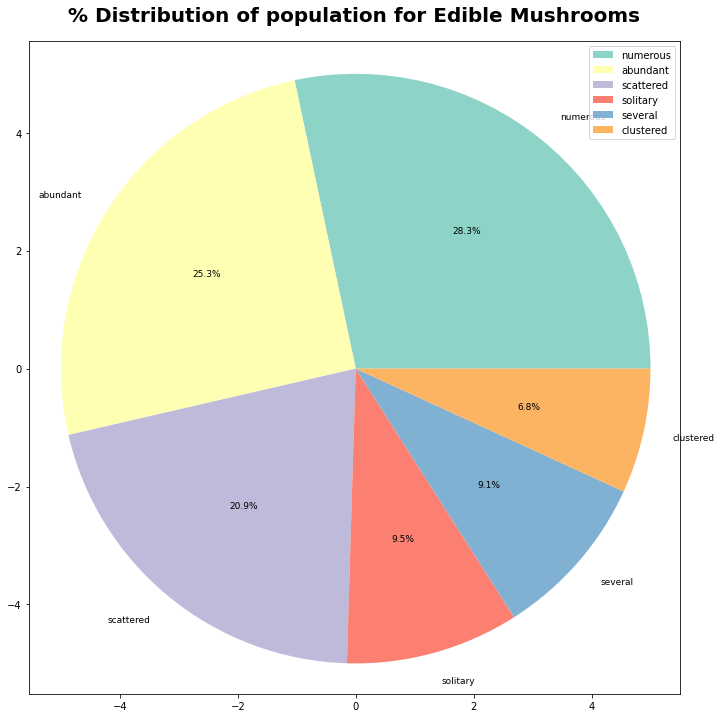

Count of habitat:
 woods      1880
grasses    1408
meadows     256
leaves      240
waste       192
paths       136
urban        96
Name: habitat, dtype: int64


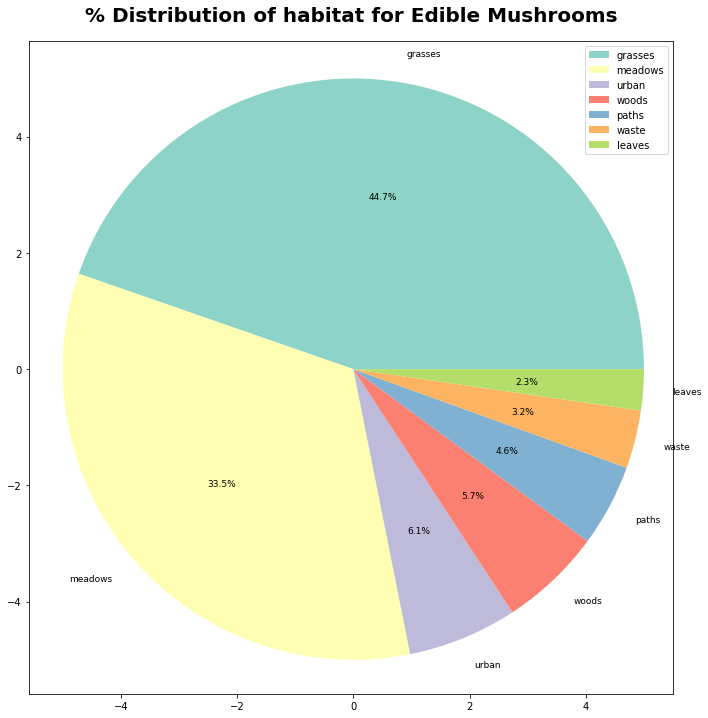

In [22]:
for col in edible_mushrooms.columns:
    print("Count of {}:\n".format(col), edible_mushrooms[col].value_counts())
    plt.figure(figsize=(12,12))
    plt.pie(edible_mushrooms[col].value_counts().values, labels=edible_mushrooms[col].unique(), autopct="%1.1f%%",colors=sns.set_palette("Set3"),
        textprops={"fontsize":9}, radius=5,frame=True)
    plt.title("% Distribution of {} for Edible Mushrooms".format(col),fontweight="black",size=20,pad=20)
    plt.legend()
    plt.show()

Count of cap_shape:
 convex     1948
flat       1596
bell        404
knobbed     228
sunken       32
Name: cap_shape, dtype: int64


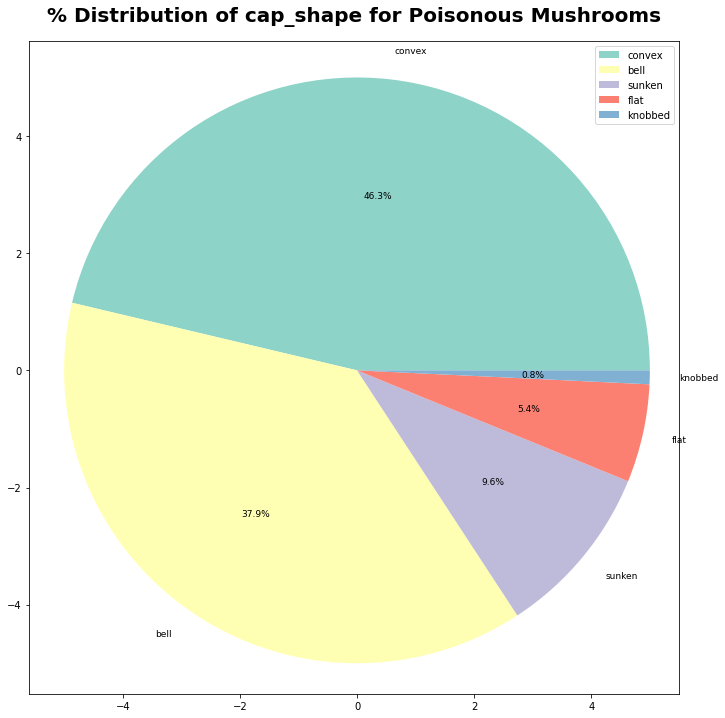

Count of cap_surface:
 fibrous    1560
scaly      1504
smooth     1144
Name: cap_surface, dtype: int64


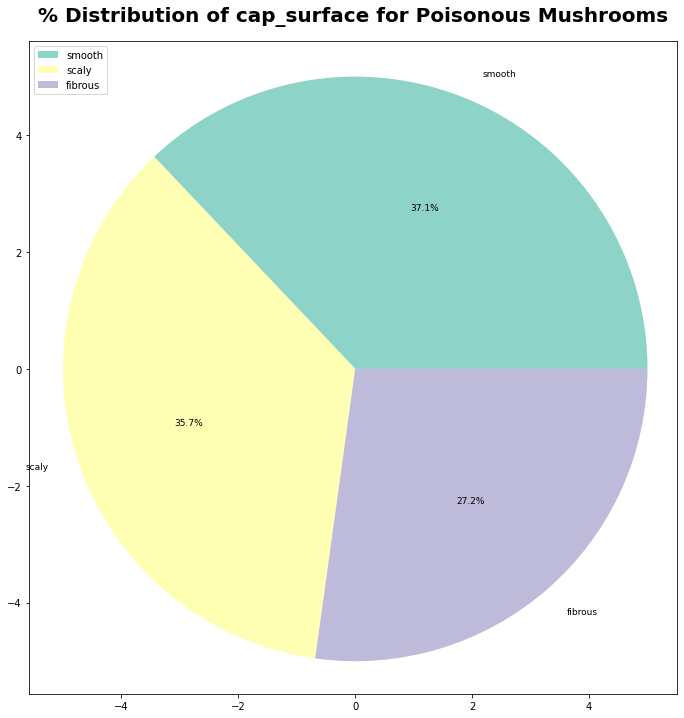

Count of cap_color:
 brown       1264
gray        1032
white        720
red          624
yellow       400
pink          56
buff          48
cinnamon      32
purple        16
green         16
Name: cap_color, dtype: int64


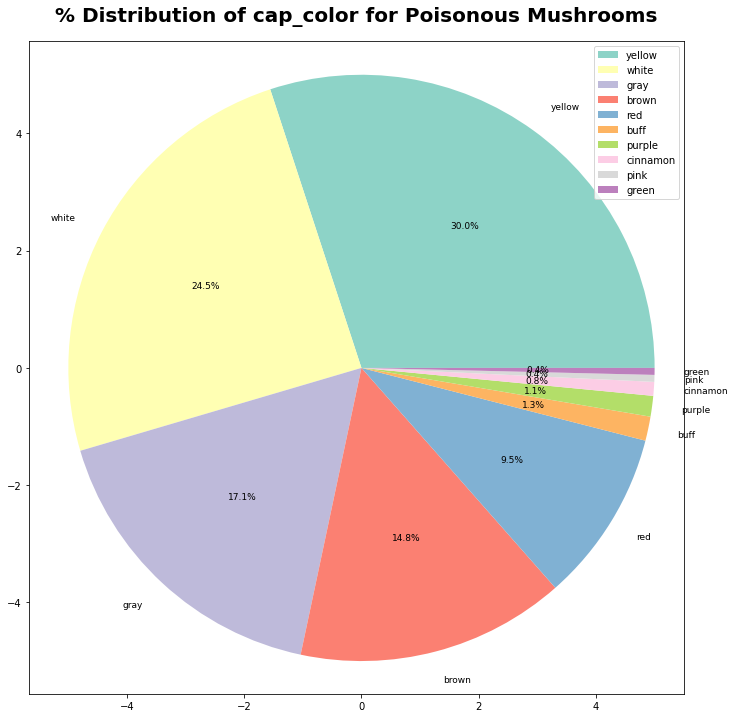

Count of bruises:
 bruised        2752
not_bruised    1456
Name: bruises, dtype: int64


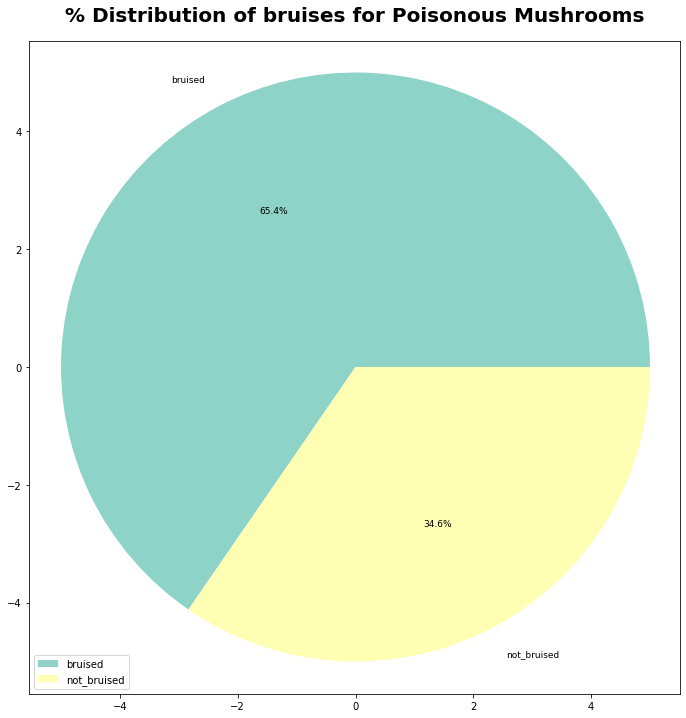

Count of odor:
 none      3408
almond     400
anise      400
Name: odor, dtype: int64


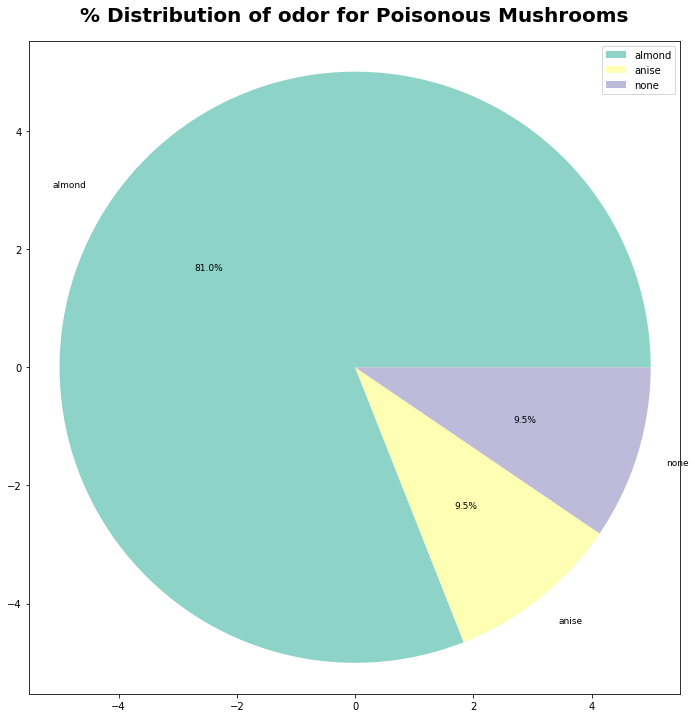

Count of gill_attachment:
 free        4016
attached     192
Name: gill_attachment, dtype: int64


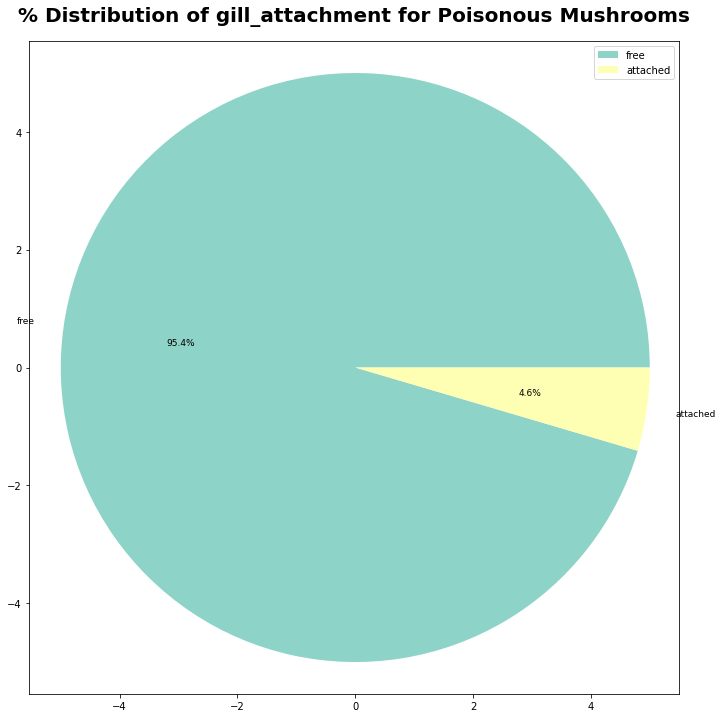

Count of gill_spacing:
 close      3008
crowded    1200
Name: gill_spacing, dtype: int64


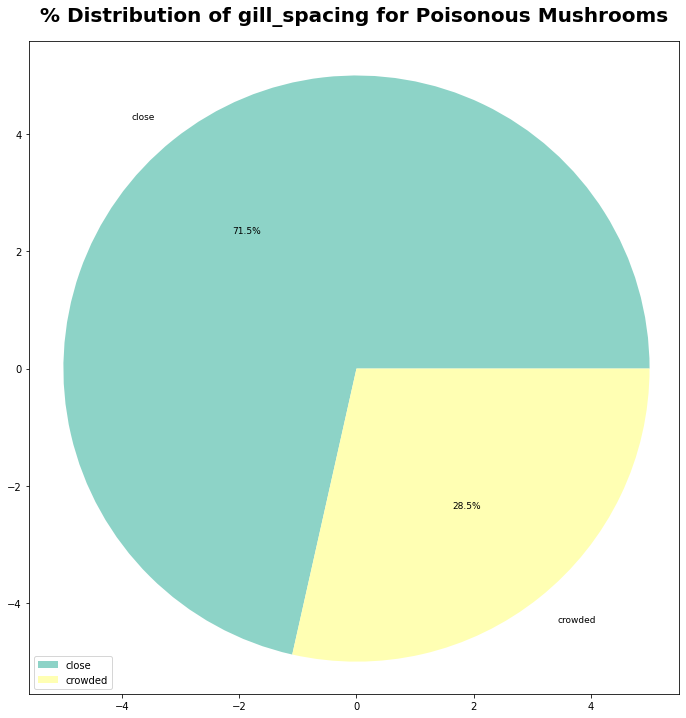

Count of gill_size:
 broad     3920
narrow     288
Name: gill_size, dtype: int64


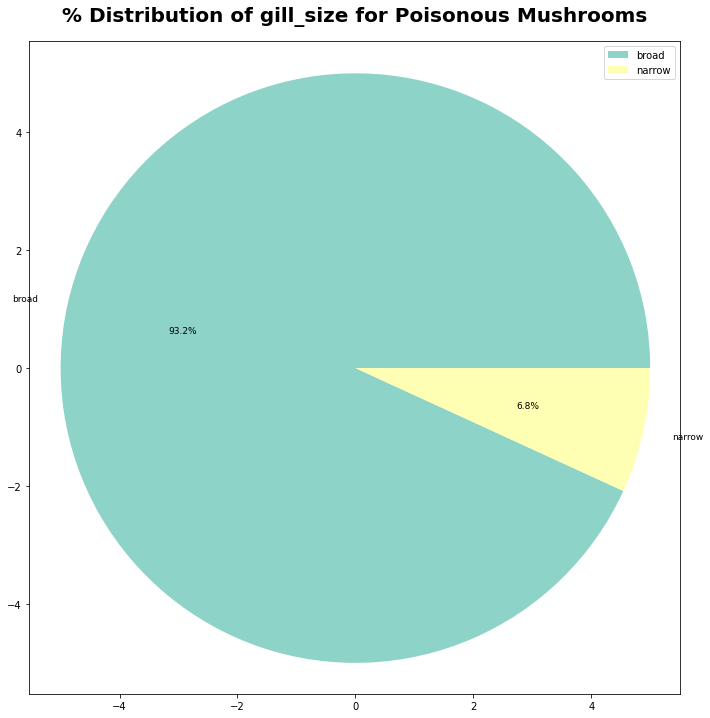

Count of gill_color:
 white        956
brown        936
pink         852
purple       444
black        344
gray         248
chocolate    204
red           96
yellow        64
orange        64
Name: gill_color, dtype: int64


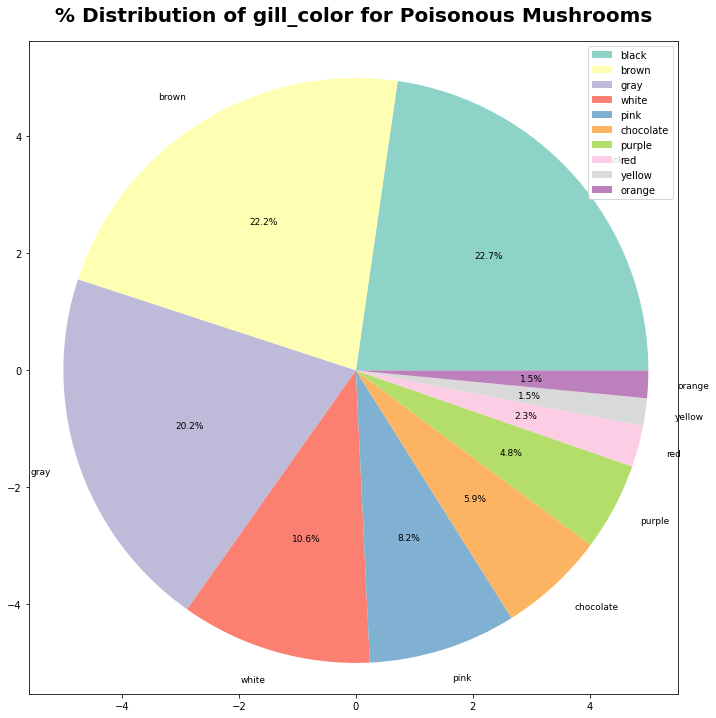

Count of stalk_shape:
 tapering     2592
enlarging    1616
Name: stalk_shape, dtype: int64


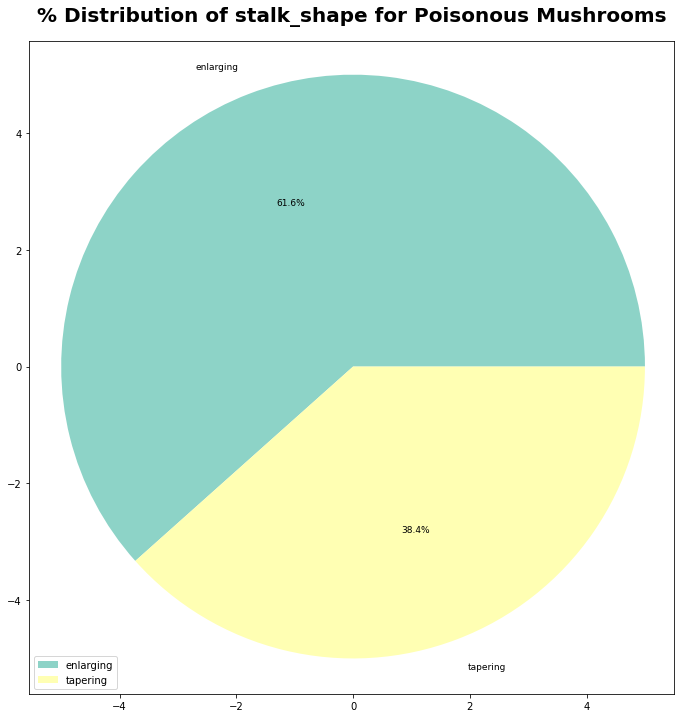

Count of stalk_root:
 bulbous    1920
equal       864
missing     720
club        512
rooted      192
Name: stalk_root, dtype: int64


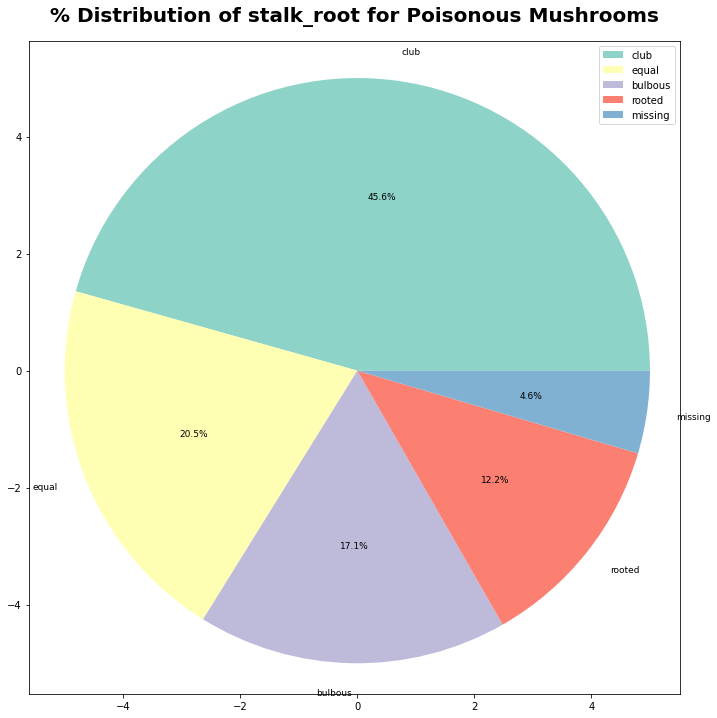

Count of stalk_surface_above_ring:
 smooth     3640
fibrous     408
silky       144
scaly        16
Name: stalk_surface_above_ring, dtype: int64


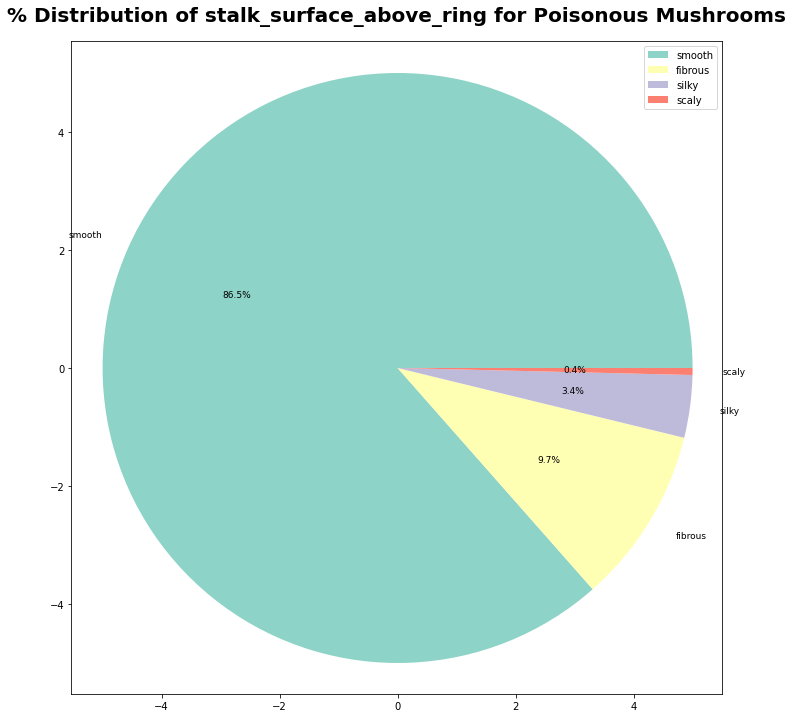

Count of stalk_surface_below_ring:
 smooth     3400
fibrous     456
scaly       208
silky       144
Name: stalk_surface_below_ring, dtype: int64


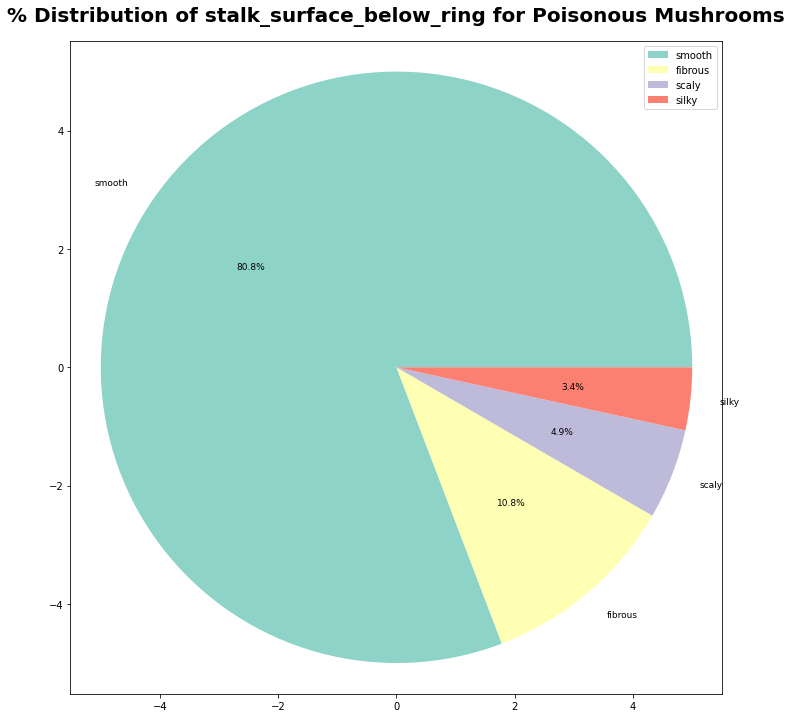

Count of stalk_color_above_ring:
 white     2752
gray       576
pink       576
orange     192
red         96
brown       16
Name: stalk_color_above_ring, dtype: int64


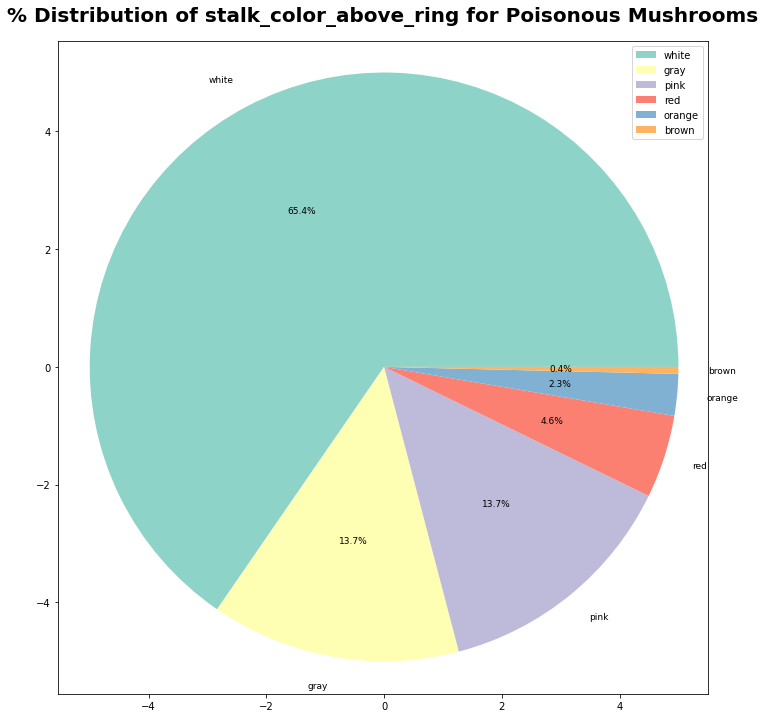

Count of stalk_color_below_ring:
 white     2704
pink       576
gray       576
orange     192
red         96
brown       64
Name: stalk_color_below_ring, dtype: int64


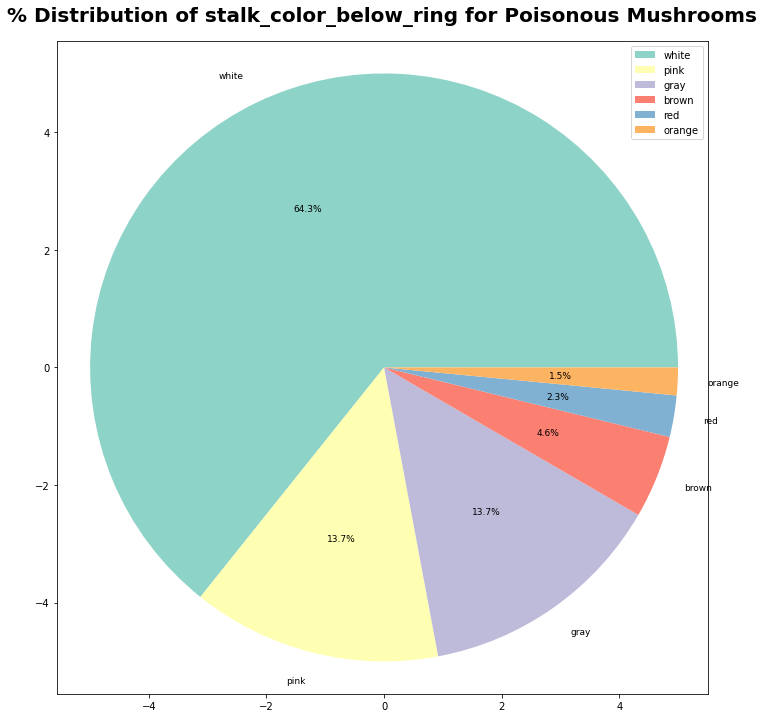

Count of veil_color:
 white     4016
brown       96
orange      96
Name: veil_color, dtype: int64


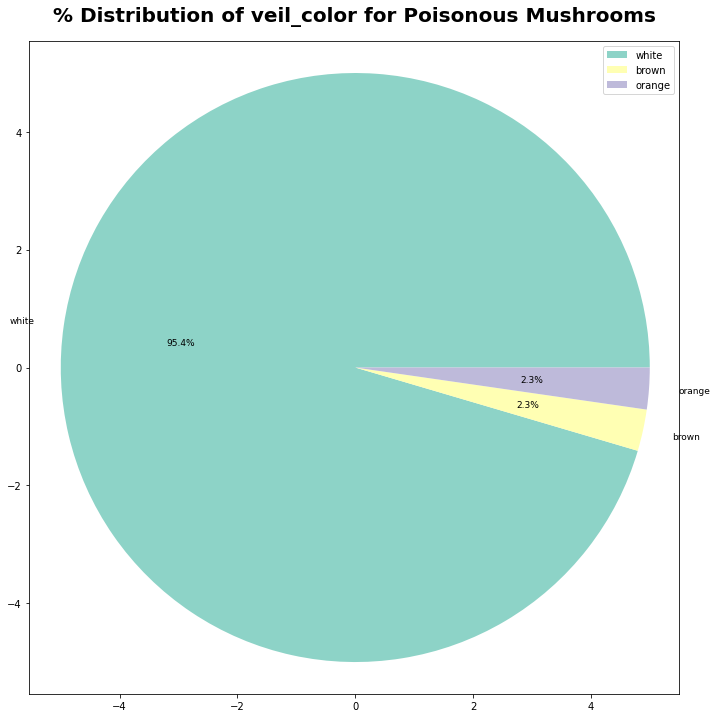

Count of ring_number:
 one    3680
two     528
Name: ring_number, dtype: int64


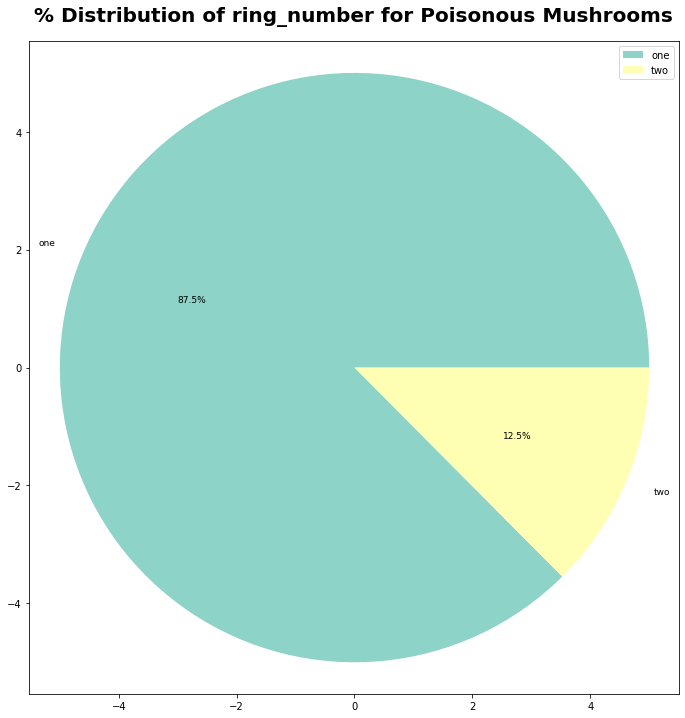

Count of ring_type:
 pendant       3152
evanescent    1008
flaring         48
Name: ring_type, dtype: int64


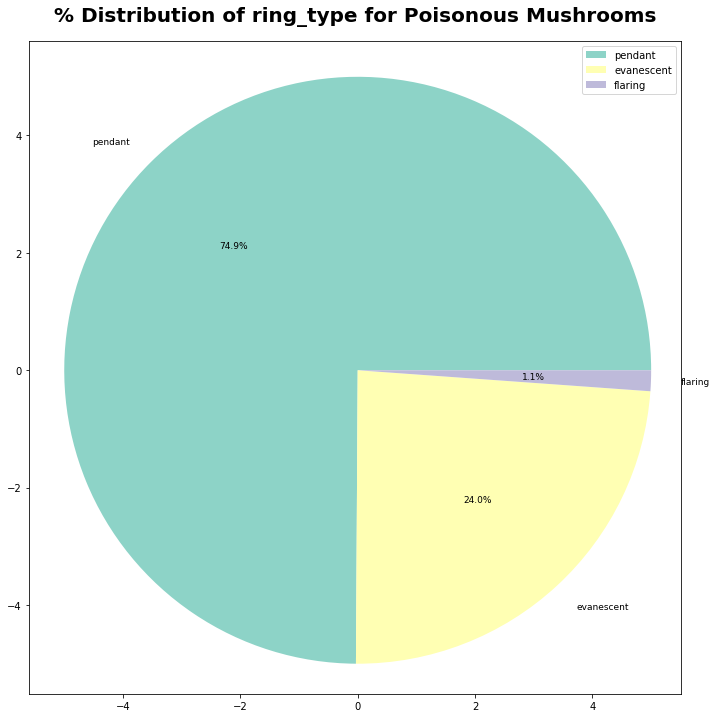

Count of spore_print_color:
 brown        1744
black        1648
white         576
purple         48
chocolate      48
orange         48
yellow         48
buff           48
Name: spore_print_color, dtype: int64


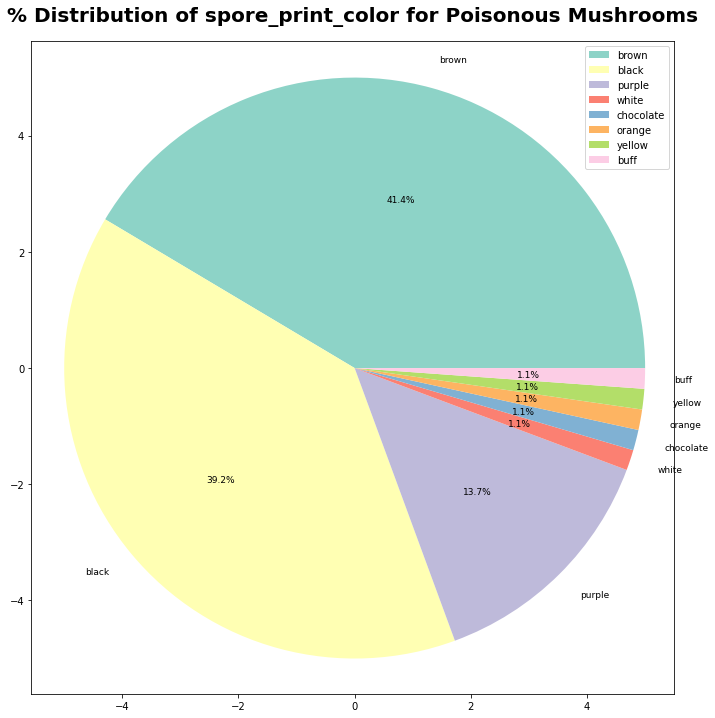

Count of population:
 several      1192
solitary     1064
scattered     880
numerous      400
abundant      384
clustered     288
Name: population, dtype: int64


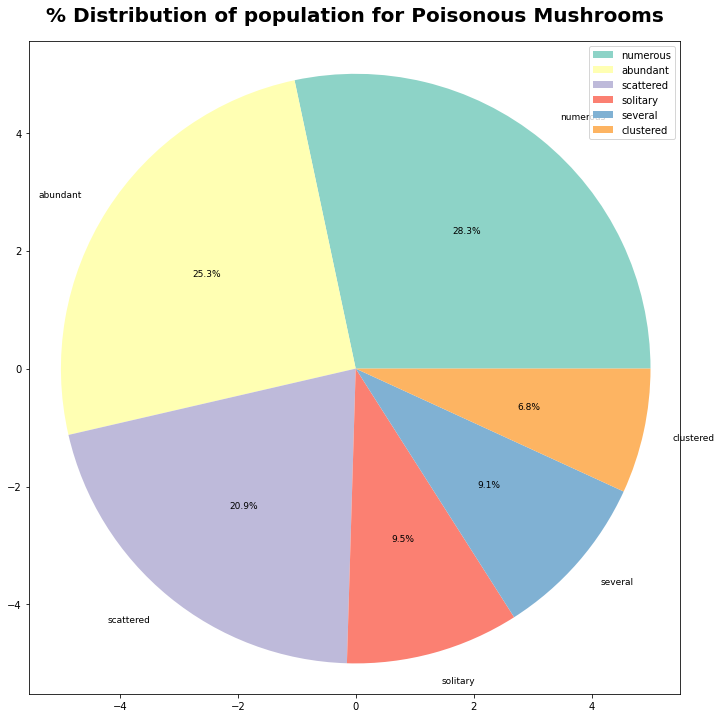

Count of habitat:
 woods      1880
grasses    1408
meadows     256
leaves      240
waste       192
paths       136
urban        96
Name: habitat, dtype: int64


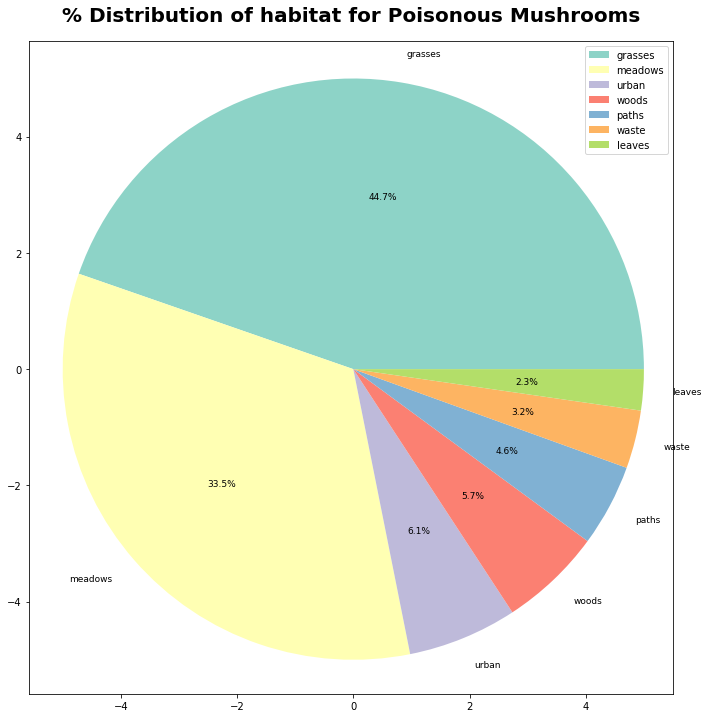

In [23]:
for col in poisonous_mushrooms.columns:
    print("Count of {}:\n".format(col), poisonous_mushrooms[col].value_counts())
    plt.figure(figsize=(12,12))
    plt.pie(poisonous_mushrooms[col].value_counts().values, labels=poisonous_mushrooms[col].unique(), autopct="%1.1f%%",colors=sns.set_palette("Set3"),
        textprops={"fontsize":9}, radius=5,frame=True)
    plt.title("% Distribution of {} for Poisonous Mushrooms".format(col),fontweight="black",size=20,pad=20)
    plt.legend()
    plt.show()

In [24]:
target = ['class']
Y = mushroom_data[target]

In [25]:
mushroom_data.drop('class', axis=1, inplace=True)
X = mushroom_data.copy()

In [26]:
columns = Y.columns.to_list()

In [27]:
#Label encoding target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns:
    Y[col] = le.fit_transform(Y[col])

In [28]:
#binary columns
bin_cols = ['gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape']

#multi-columns
multi_cols = [i for i in mushroom_data.columns if i not in bin_cols]

#Label Encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    X[i] = le.fit_transform(X[i])

#duplicating cols for multi-value columns
X = pd.get_dummies(data=X, columns=multi_cols, sparse=True)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=0)

In [30]:
#Top 10 features from Random Forest
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)
myClassifiers = pd.Series(model1.feature_importances_, index=X_train.columns)
myClassifiers = myClassifiers.sort_values(ascending=False)
print("Top 10 features:\n")
print(myClassifiers.head(10))

Top 10 features:

odor_none                         0.178533
gill_size                         0.065731
odor_foul                         0.064010
spore_print_color_chocolate       0.041455
gill_color_buff                   0.037825
stalk_surface_above_ring_silky    0.036662
stalk_root_equal                  0.030961
bruises_bruised                   0.030427
stalk_surface_below_ring_silky    0.029502
ring_type_pendant                 0.025214
dtype: float64


In [31]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.head(10)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


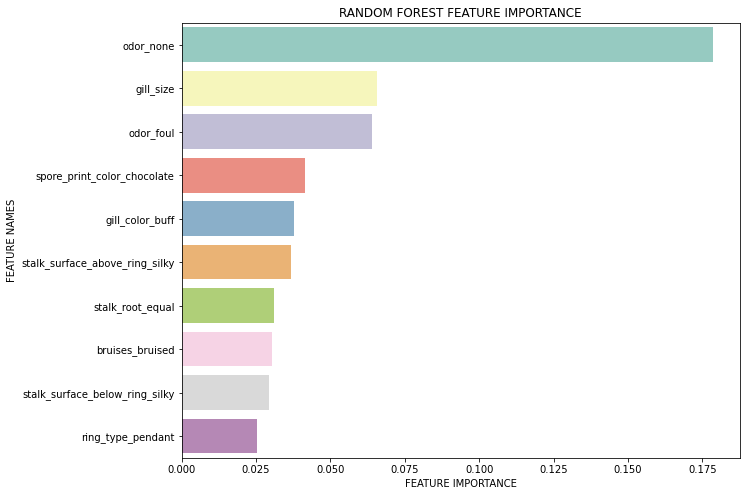

In [32]:
plot_feature_importance(model1.feature_importances_,X_train.columns,'RANDOM FOREST ')

In [33]:
#Classification Report for Random Forest
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score
#predict labels for test data
y_pred1 = model1.predict(X_test)
#classification Report
print("Random Forest Classification Report")
print(classification_report(Y_test,y_pred1))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Top 10 features:

odor_none                          0.144065
odor_foul                          0.084556
gill_color_buff                    0.067382
gill_size                          0.055942
stalk_surface_above_ring_silky     0.048573
bruises_not_bruised                0.037064
stalk_surface_below_ring_silky     0.031513
ring_type_pendant                  0.031223
odor_pungent                       0.026197
stalk_surface_above_ring_smooth    0.026025
dtype: float64
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



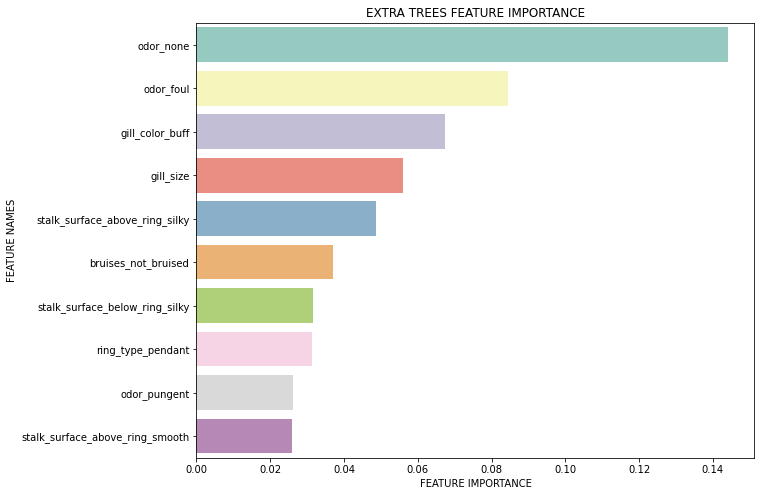

In [34]:
#Top 10 features from ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
model2 = ExtraTreesClassifier()
model2.fit(X_train, Y_train)
myClassifiers = pd.Series(model2.feature_importances_, index=X_train.columns)
myClassifiers = myClassifiers.sort_values(ascending=False)
print("Top 10 features:\n")
print(myClassifiers.head(10))
plot_feature_importance(model2.feature_importances_,X_train.columns,'EXTRA TREES ')
#Classification Report for Random Forest
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score
#predict labels for test data
y_pred2 = model2.predict(X_test)
#classification Report
print("Random Forest Classification Report")
print(classification_report(Y_test,y_pred2))

Top 10 features:

stalk_surface_below_ring_scaly    0.12
gill_size                         0.10
population_clustered              0.10
spore_print_color_green           0.06
bruises_bruised                   0.06
stalk_surface_above_ring_silky    0.06
population_several                0.04
spore_print_color_white           0.04
odor_foul                         0.04
odor_none                         0.04
dtype: float64
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



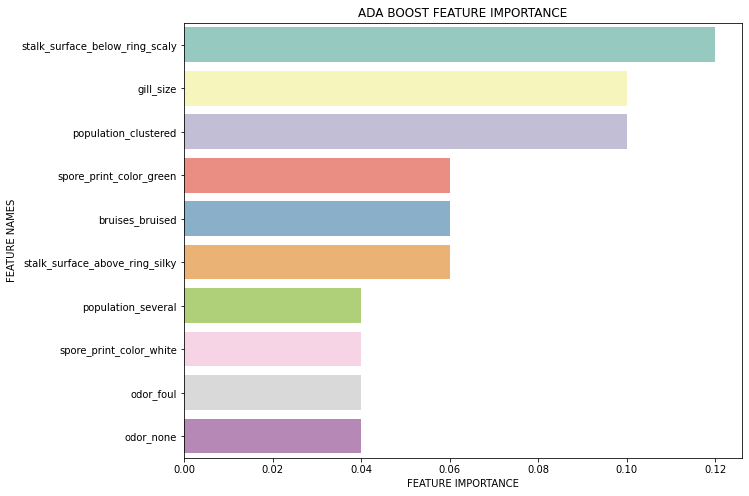

In [35]:
#Top 10 features from AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier()
model3.fit(X_train, Y_train)
myClassifiers = pd.Series(model3.feature_importances_, index=X_train.columns)
myClassifiers = myClassifiers.sort_values(ascending=False)
print("Top 10 features:\n")
print(myClassifiers.head(10))
plot_feature_importance(model3.feature_importances_,X_train.columns,'ADA BOOST ')
#Classification Report for AdaBoostRegressor
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score
#predict labels for test data
y_pred3 = model3.predict(X_test)
#classification Report
print("Random Forest Classification Report")
print(classification_report(Y_test,y_pred3))

Top 10 features:

odor_none                         0.625526
stalk_root_club                   0.092593
odor_almond                       0.073405
odor_anise                        0.065958
stalk_surface_below_ring_scaly    0.036461
spore_print_color_green           0.034540
stalk_root_rooted                 0.023306
bruises_not_bruised               0.019692
habitat_urban                     0.006457
population_clustered              0.004017
dtype: float64
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



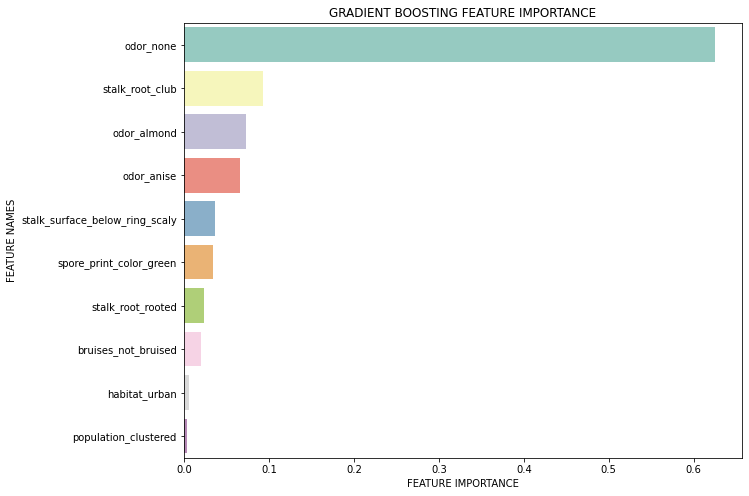

In [36]:
#Top 10 features from GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier()
model4.fit(X_train, Y_train)
myClassifiers = pd.Series(model4.feature_importances_, index=X_train.columns)
myClassifiers = myClassifiers.sort_values(ascending=False)
print("Top 10 features:\n")
print(myClassifiers.head(10))
plot_feature_importance(model4.feature_importances_,X_train.columns,'GRADIENT BOOSTING ')
#Classification Report for AdaBoostRegressor
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score
#predict labels for test data
y_pred4 = model4.predict(X_test)
#classification Report
print("Random Forest Classification Report")
print(classification_report(Y_test,y_pred4))

Top 10 features:

odor_none                         0.283856
stalk_root_club                   0.231815
stalk_root_rooted                 0.133553
spore_print_color_purple          0.095251
odor_anise                        0.053113
odor_almond                       0.052667
spore_print_color_green           0.045361
bruises_bruised                   0.025951
stalk_surface_below_ring_scaly    0.022844
habitat_urban                     0.018279
dtype: float32
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



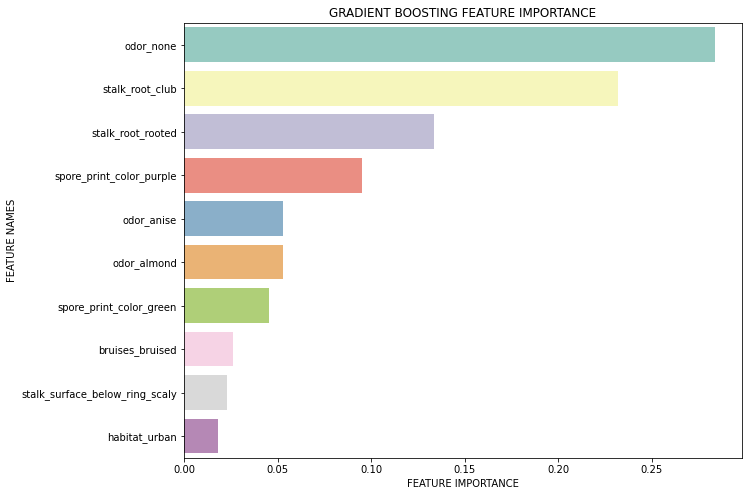

In [38]:
#Top 10 features from XGBClassifier
from xgboost import XGBClassifier
model5 = XGBClassifier()
model5.fit(X_train.values, Y_train.values)
myClassifiers = pd.Series(model5.feature_importances_, index=X_train.columns)
myClassifiers = myClassifiers.sort_values(ascending=False)
print("Top 10 features:\n")
print(myClassifiers.head(10))
plot_feature_importance(model5.feature_importances_,X_train.columns,'GRADIENT BOOSTING ')
#Classification Report for AdaBoostRegressor
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score
#predict labels for test data
y_pred5 = model5.predict(X_test.values)
#classification Report
print("Random Forest Classification Report")
print(classification_report(Y_test,y_pred5))

In [ ]:
#Hypetuning RandomForest Model1
#Fine-tuning the parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':list(np.arange(10,100,10)),
              'max_depth': np.linspace(1,50,50,endpoint=True),
              'min_samples_split': np.linspace(0.001,0.2,100,endpoint=True),
              'min_samples_leaf': np.linspace(0.001,0.1,100,endpoint=True),
              'max_features': list(range(1,X.shape[1],1)),
              'criterion': ['gini', 'entropy', 'log_loss']}
grid = GridSearchCV(model1, param_grid, refit=True, verbose=3)

In [ ]:
grid.fit(X_train, Y_train)